In [2]:
import pystan
import arviz as az
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 20)

from sklearn import preprocessing
from sklearn import model_selection 
from sklearn import metrics
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D


import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# The Pima Dataset 

In [19]:
dataset = pd.read_csv('data/pima-indians-diabetes.csv', header=None)
dataset.columns = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
display(dataset)

print("Zero values")
print((dataset == 0).sum())


preg  plas  pres  skin  test  mass   pedi  age  class
0       6   148    72    35     0  33.6  0.627   50      1
1       1    85    66    29     0  26.6  0.351   31      0
2       8   183    64     0     0  23.3  0.672   32      1
3       1    89    66    23    94  28.1  0.167   21      0
4       0   137    40    35   168  43.1  2.288   33      1
..    ...   ...   ...   ...   ...   ...    ...  ...    ...
763    10   101    76    48   180  32.9  0.171   63      0
764     2   122    70    27     0  36.8  0.340   27      0
765     5   121    72    23   112  26.2  0.245   30      0
766     1   126    60     0     0  30.1  0.349   47      1
767     1    93    70    31     0  30.4  0.315   23      0

[768 rows x 9 columns]

preg     111
plas       5
pres      35
skin     227
test     374
mass      11
pedi       0
age        0
class    500
dtype: int64


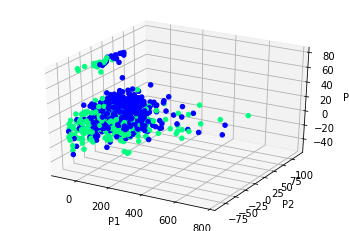

In [5]:
# PCA analysis

# Wanted to see if the data could be easier to separate after PCA.

pca = PCA(n_components=3)
pca_data = pca.fit_transform(dataset[['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']].to_numpy())
datafr_pca = pd.DataFrame(pca_data) 
datafr_pca.columns = ['P1', 'P2', 'P3'] 

labels = dataset["class"].to_numpy()

# Visualize the pca
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(datafr_pca['P1'], datafr_pca['P2'], datafr_pca['P3'], c = labels, cmap = plt.cm.winter, alpha = 1) 

ax.set_xlabel('P1')
ax.set_ylabel('P2')
ax.set_zlabel('P3')

plt.show()  

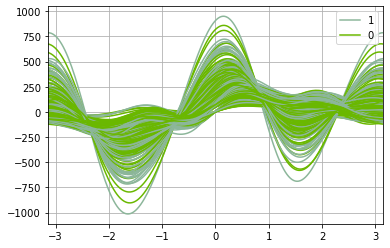

In [6]:
x = pd.plotting.andrews_curves(dataset, 'class') 
x.plot() 
  
plt.show()

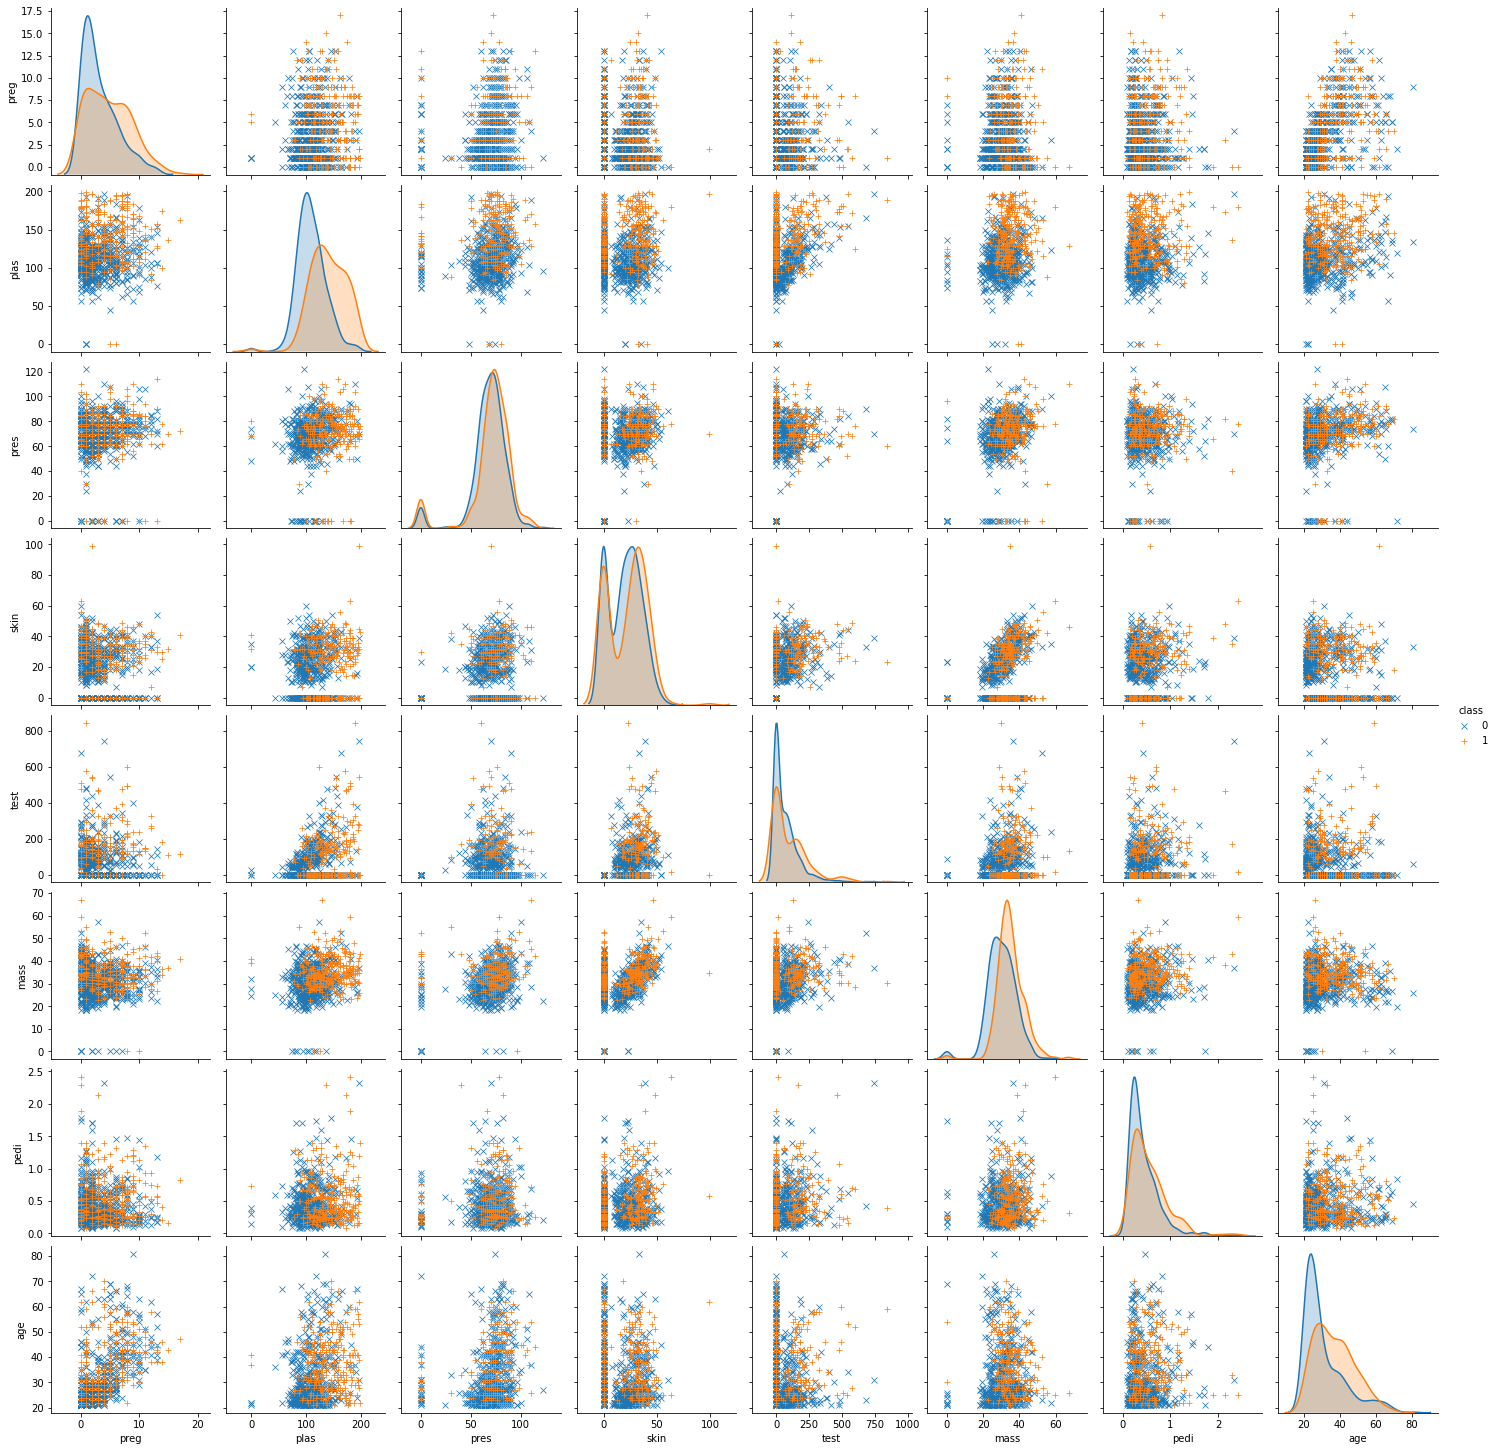

In [7]:
sns.pairplot(dataset, hue='class', markers=['x','+'])  

plt.show()

# The Bank note data set 

In [8]:
dataset2 = pd.read_csv('data/BankNote_Authentication.csv', na_values='.')
display(dataset2)
print("Nan values")
print(dataset2.isna().any())



variance  skewness  curtosis  entropy  class
0      3.62160   8.66610   -2.8073 -0.44699      0
1      4.54590   8.16740   -2.4586 -1.46210      0
2      3.86600  -2.63830    1.9242  0.10645      0
3      3.45660   9.52280   -4.0112 -3.59440      0
4      0.32924  -4.45520    4.5718 -0.98880      0
...        ...       ...       ...      ...    ...
1367   0.40614   1.34920   -1.4501 -0.55949      1
1368  -1.38870  -4.87730    6.4774  0.34179      1
1369  -3.75030 -13.45860   17.5932 -2.77710      1
1370  -3.56370  -8.38270   12.3930 -1.28230      1
1371  -2.54190  -0.65804    2.6842  1.19520      1

[1372 rows x 5 columns]

variance    False
skewness    False
curtosis    False
entropy     False
class       False
dtype: bool


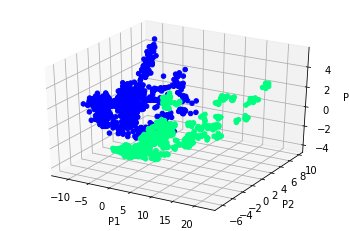

In [9]:
# PCA analysis

# Wanted to see if the data could be easier to separate after PCA.

pca = PCA(n_components=3)
pca_data = pca.fit_transform(dataset2[['variance', 'skewness', 'curtosis', 'entropy']].to_numpy())
datafr_pca = pd.DataFrame(pca_data) 
datafr_pca.columns = ['P1', 'P2', 'P3'] 

labels = dataset2["class"].to_numpy()

# Visualize the pca
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(datafr_pca['P1'], datafr_pca['P2'], datafr_pca['P3'], c = labels, cmap = plt.cm.winter, alpha = 1) 

ax.set_xlabel('P1')
ax.set_ylabel('P2')
ax.set_zlabel('P3')

plt.show()  


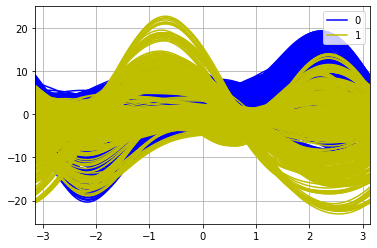

In [13]:
x = pd.plotting.andrews_curves(dataset2, 'class', color = ["b", "y"]) 
x.plot() 
  
plt.show()

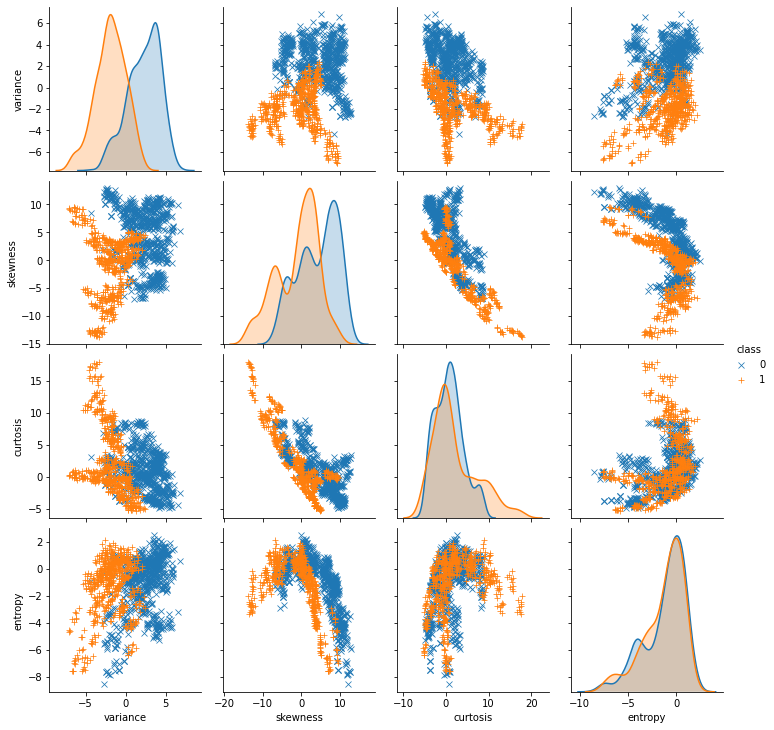

In [14]:
sns.pairplot(dataset2, hue='class', markers=['x','+'])  

plt.show()

#  The Wisconsin Cancer Dataset (original)

1. Sample code number: id number
2. Clump Thickness: 1 - 10
3. Uniformity of Cell Size: 1 - 10
4. Uniformity of Cell Shape: 1 - 10
5. Marginal Adhesion: 1 - 10
6. Single Epithelial Cell Size: 1 - 10
7. Bare Nuclei: 1 - 10   !!! Has some values as ? -> drop those rows
8. Bland Chromatin: 1 - 10
9. Normal Nucleoli: 1 - 10
10. Mitoses: 1 - 10
11. Class: (2 for benign, 4 for malignant)

In [9]:
headers = ["id", "Clump thickness", "Uniformity size", "Uniformity shape","Adhesion", "Epithelial size", "Bare nuclei", "Bland Chromatin", "Normal Nucleoli", "Mitoses", "class"]
dataset3 = pd.read_csv('data/Wisconsin_cancer_dataset.txt', sep=",", header=None, names=headers)
print(dataset3[dataset3["Bare nuclei"] == "?"].index)


# Drop data points with bad values
dataset3 = dataset3.drop(["id"], axis=1)
dataset3.drop((dataset3[dataset3["Bare nuclei"] == "?"].index),axis=0, inplace=True)
dataset3["Bare nuclei"] = dataset3["Bare nuclei"].astype(str).astype(int)

display(dataset3)
print(dataset3.dtypes)

print("Nan values")
print(dataset3.isna().any())
print("Zero values")
print((dataset3 == 0).sum())



Int64Index([23, 40, 139, 145, 158, 164, 235, 249, 275, 292, 294, 297, 315, 321,
            411, 617],
           dtype='int64')


Clump thickness  Uniformity size  Uniformity shape  Adhesion  \
0                  5                1                 1         1   
1                  5                4                 4         5   
2                  3                1                 1         1   
3                  6                8                 8         1   
4                  4                1                 1         3   
..               ...              ...               ...       ...   
694                3                1                 1         1   
695                2                1                 1         1   
696                5               10                10         3   
697                4                8                 6         4   
698                4                8                 8         5   

     Epithelial size  Bare nuclei  Bland Chromatin  Normal Nucleoli  Mitoses  \
0                  2            1                3                1        1   
1                  7           10                3                2        1   
2                  2            2                3                1        1   
3                  3            4                3                7        1   
4                  2            1                3                1        1   
..               ...          ...              ...              ...      ...   
694                3            2                1                1        1   
695                2            1                1                1        1   
696                7            3                8               10        2   
697                3            4               10                6        1   
698                4            5               10                4        1   

     class  
0        2  
1        2  
2        2  
3        2  
4        2  
..     ...  
694      2  
695      2  
696      4  
697      4  
698      4  

[683 rows x 10 columns]

Clump thickness     int64
Uniformity size     int64
Uniformity shape    int64
Adhesion            int64
Epithelial size     int64
Bare nuclei         int64
Bland Chromatin     int64
Normal Nucleoli     int64
Mitoses             int64
class               int64
dtype: object
Nan values
Clump thickness     False
Uniformity size     False
Uniformity shape    False
Adhesion            False
Epithelial size     False
Bare nuclei         False
Bland Chromatin     False
Normal Nucleoli     False
Mitoses             False
class               False
dtype: bool
Zero values
Clump thickness     0
Uniformity size     0
Uniformity shape    0
Adhesion            0
Epithelial size     0
Bare nuclei         0
Bland Chromatin     0
Normal Nucleoli     0
Mitoses             0
class               0
dtype: int64


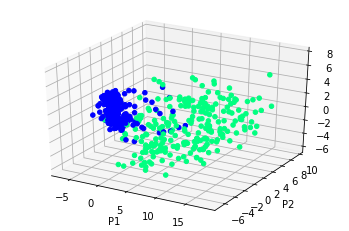

In [75]:
# PCA analysis

# Wanted to see if the data could be easier to separate after PCA.

dataset3_np = dataset3[["Clump thickness", "Uniformity size", "Uniformity shape","Adhesion", "Epithelial size", "Bare nuclei", "Bland Chromatin", "Normal Nucleoli", "Mitoses"]].to_numpy()

pca = PCA(n_components=3)
pca_data = pca.fit_transform(dataset3_np)
datafr_pca = pd.DataFrame(pca_data) 
datafr_pca.columns = ['P1', 'P2', 'P3'] 

labels = dataset3["class"].to_numpy()

# Visualize the pca
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(datafr_pca['P1'], datafr_pca['P2'], datafr_pca['P3'], c = labels, cmap = plt.cm.winter, alpha = 1) 

ax.set_xlabel('P1')
ax.set_ylabel('P2')
#ax.set_zlabel('P3')

plt.show()  


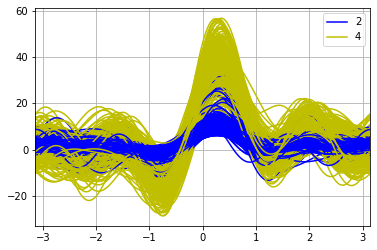

In [5]:
x = pd.plotting.andrews_curves(dataset3, 'class', color = ["b", "y"]) 
x.plot() 
  
plt.show()

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data i

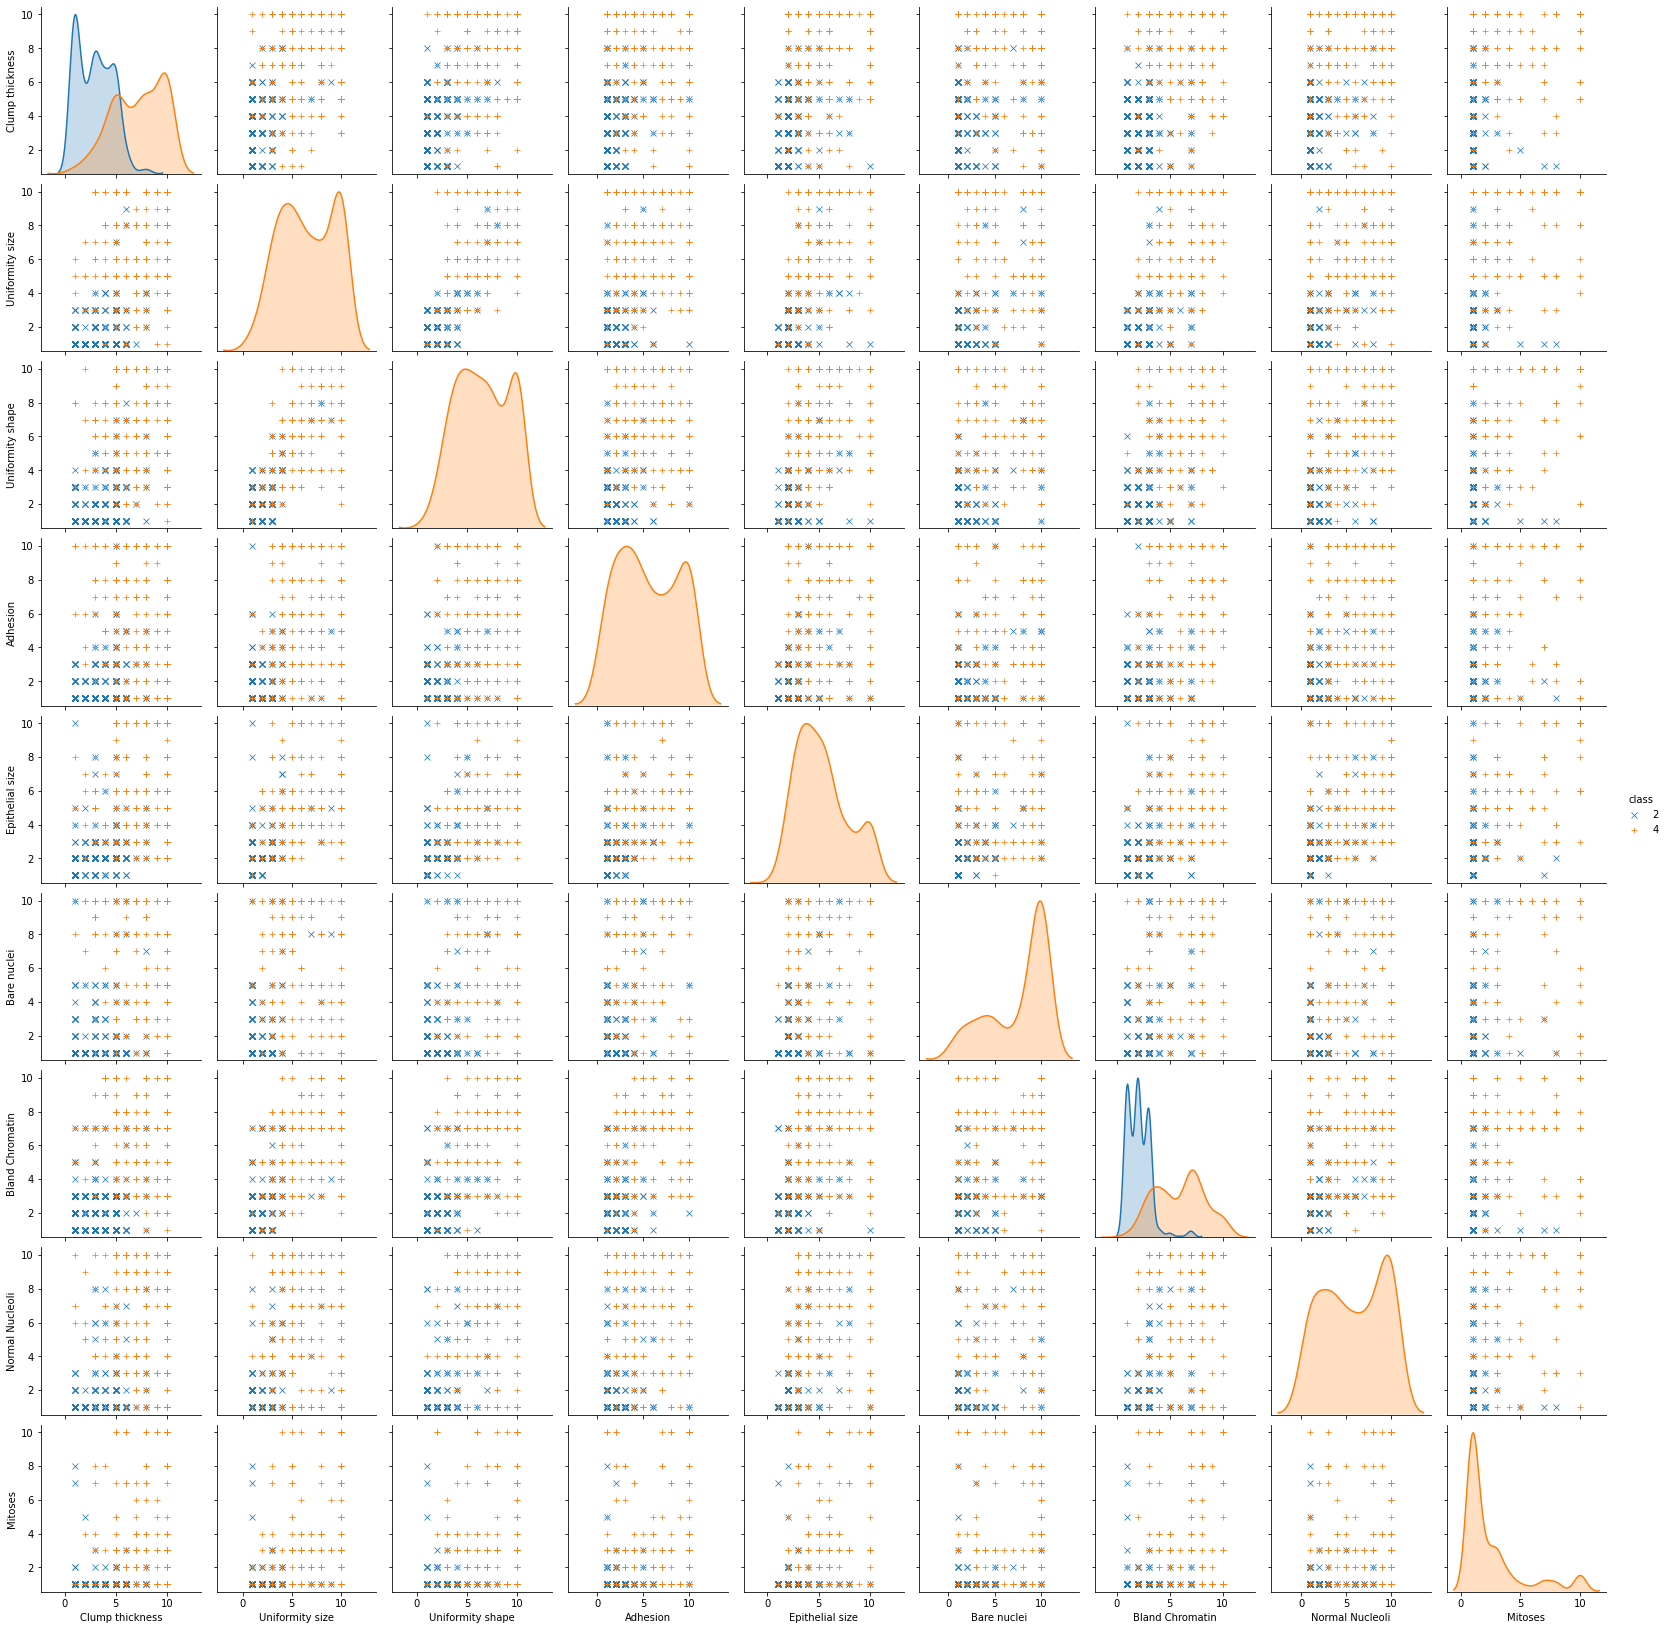

In [6]:
sns.pairplot(dataset3, hue='class', markers=['x','+'])  

plt.show()

#  The Wisconsin Cancer Dataset (diagnostics)

Attribute Information:

1. ID number
2. Diagnosis (M = malignant, B = benign)
3. texture (standard deviation of gray-scale values)
4. perimeter
5. area
6. smoothness (local variation in radius lengths)
7. compactness (perimeter^2 / area - 1.0)
8. concavity (severity of concave portions of the contour)
9. concave points (number of concave portions of the contour)
10. symmetry
11. fractal dimension ("coastline approximation" - 1)

(3-11)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

In [54]:
#headers = ["age", "operation y", "positive nodes", "class"]
dataset6 = pd.read_csv('data/data_breast_diagnostic.csv')
dataset6 = dataset6.iloc[:, 1: 12]

display(dataset6)
print(dataset6.dtypes)

print("Nan values")
print(dataset6.isna().any())
print("Zero values")
print((dataset6 == 0).sum())


diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  fractal_dimension_mean  
0           0.2419                 0.07871  
1           0.1812                 0.05667  
2           0.2069                 0.05999  
3           0.2597                 0.09744  
4           0.1809                 0.05883  
..             ...                     ...  
564         0.1726                 0.05623  
565         0.1752                 0.05533  
566         0.1590                 0.05648  
567         0.2397                 0.07016  
568         0.1587                 0.05884  

[569 rows x 11 columns]

diagnosis                  object
radius_mean               float64
texture_mean              float64
perimeter_mean            float64
area_mean                 float64
smoothness_mean           float64
compactness_mean          float64
concavity_mean            float64
concave points_mean       float64
symmetry_mean             float64
fractal_dimension_mean    float64
dtype: object
Nan values
diagnosis                 False
radius_mean               False
texture_mean              False
perimeter_mean            False
area_mean                 False
smoothness_mean           False
compactness_mean          False
concavity_mean            False
concave points_mean       False
symmetry_mean             False
fractal_dimension_mean    False
dtype: bool
Zero values
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean        

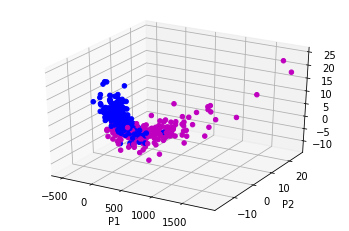

In [59]:
# PCA analysis

# Wanted to see if the data could be easier to separate after PCA.

dataset6_np = dataset6[dataset6.columns.difference(['diagnosis'])].to_numpy()

pca = PCA(n_components=3)
pca_data = pca.fit_transform(dataset6_np)
datafr_pca = pd.DataFrame(pca_data) 
datafr_pca.columns = ['P1', 'P2', 'P3'] 

labels = dataset6["diagnosis"].to_numpy()

# Visualize the pca
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(datafr_pca['P1'], datafr_pca['P2'], datafr_pca['P3'], c = labels, cmap = plt.cm.winter, alpha = 1) 

ax.set_xlabel('P1')
ax.set_ylabel('P2')
#ax.set_zlabel('P3')

plt.show()  

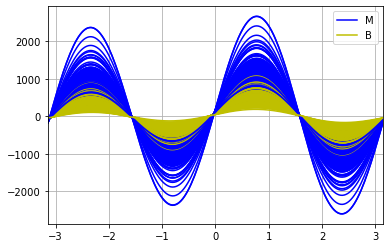

In [60]:
x = pd.plotting.andrews_curves(dataset6, 'diagnosis', color = ["b", "y"]) 
x.plot() 
  
plt.show()

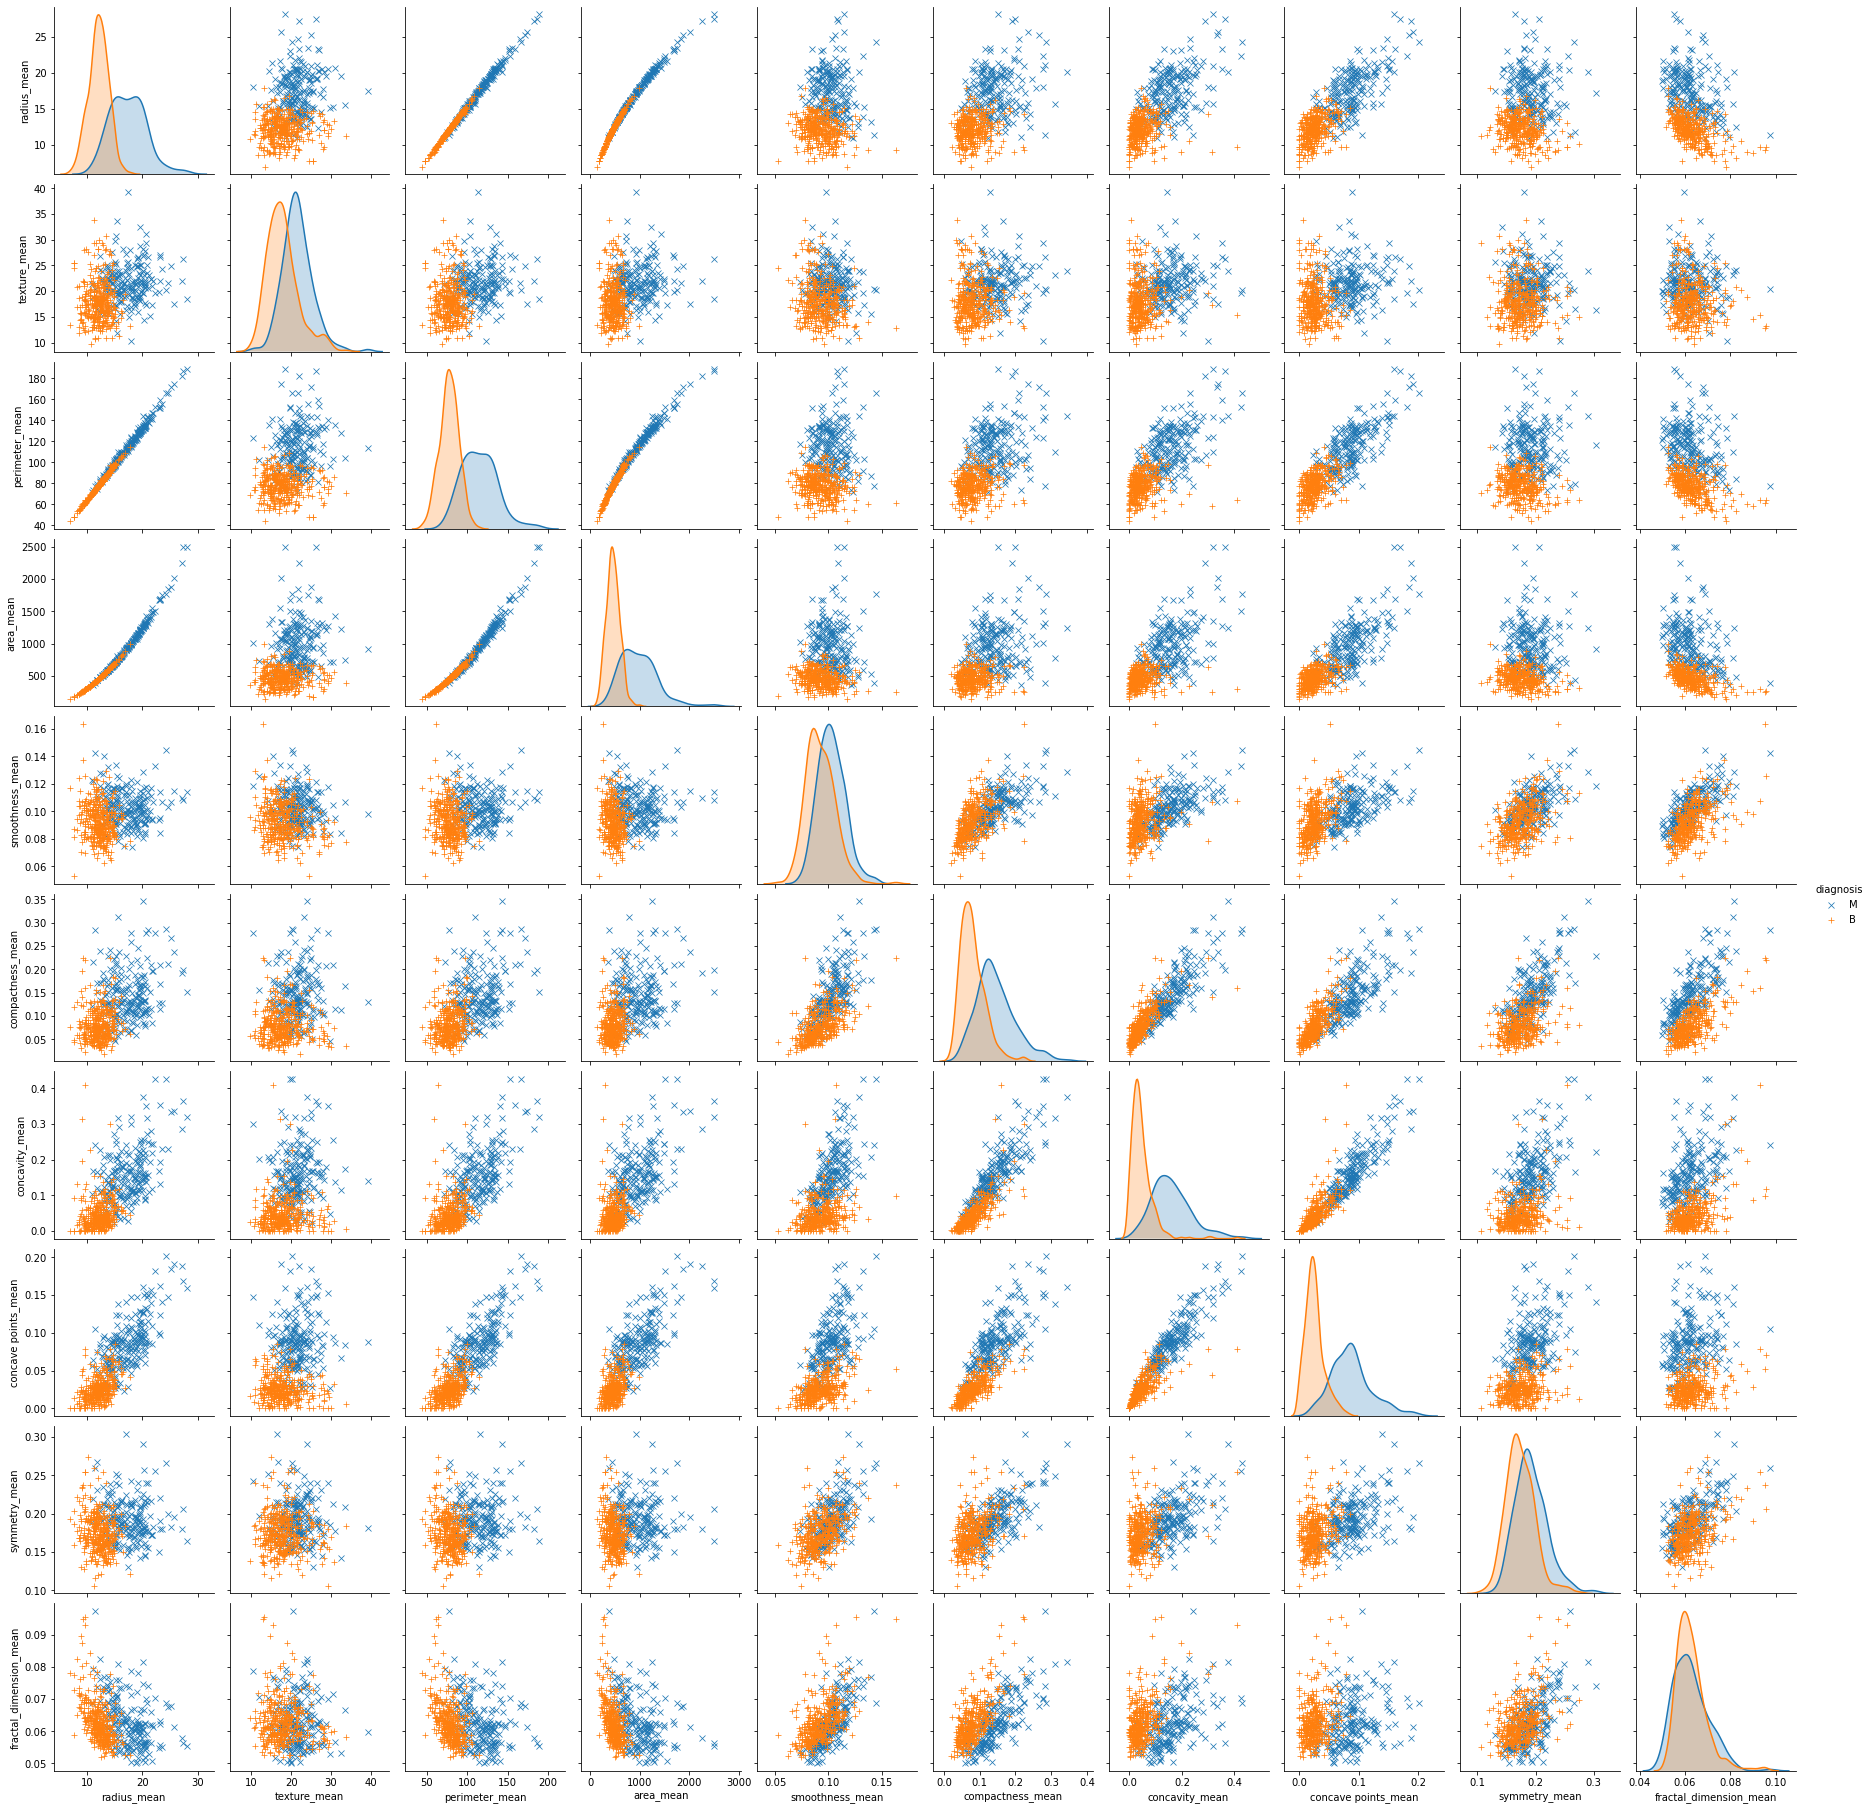

In [61]:
sns.pairplot(dataset6, hue='diagnosis', markers=['x','+'])  

plt.show()

# Haberman’s Survival Dataset

1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

In [32]:
headers = ["age", "operation y", "positive nodes", "class"]
dataset4 = pd.read_csv('data/haberman.csv', header=None, names=headers)


display(dataset4)
print(dataset4.dtypes)

print("Nan values")
print(dataset4.isna().any())
print("Zero values")
print((dataset4 == 0).sum())



age  operation y  positive nodes  class
0     30           64               1      1
1     30           62               3      1
2     30           65               0      1
3     31           59               2      1
4     31           65               4      1
..   ...          ...             ...    ...
301   75           62               1      1
302   76           67               0      1
303   77           65               3      1
304   78           65               1      2
305   83           58               2      2

[306 rows x 4 columns]

age               int64
operation y       int64
positive nodes    int64
class             int64
dtype: object
Nan values
age               False
operation y       False
positive nodes    False
class             False
dtype: bool
Zero values
age                 0
operation y         0
positive nodes    136
class               0
dtype: int64


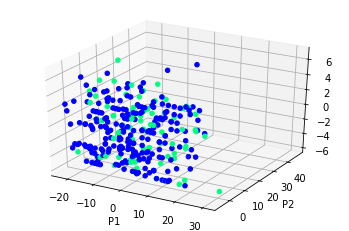

In [33]:
# PCA analysis

# Wanted to see if the data could be easier to separate after PCA.

dataset4_np = dataset4[["age", "operation y", "positive nodes"]].to_numpy()

pca = PCA(n_components=3)
pca_data = pca.fit_transform(dataset4_np)
datafr_pca = pd.DataFrame(pca_data) 
datafr_pca.columns = ['P1', 'P2', 'P3'] 

labels = dataset4["class"].to_numpy()

# Visualize the pca
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(datafr_pca['P1'], datafr_pca['P2'], datafr_pca['P3'], c = labels, cmap = plt.cm.winter, alpha = 1) 

ax.set_xlabel('P1')
ax.set_ylabel('P2')
#ax.set_zlabel('P3')

plt.show()  


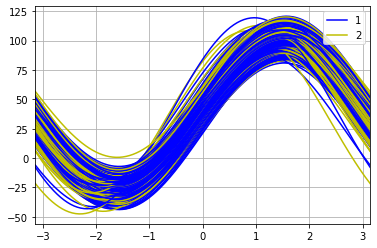

In [35]:
x = pd.plotting.andrews_curves(dataset4, 'class', color = ["b", "y"]) 
x.plot() 
  
plt.show()

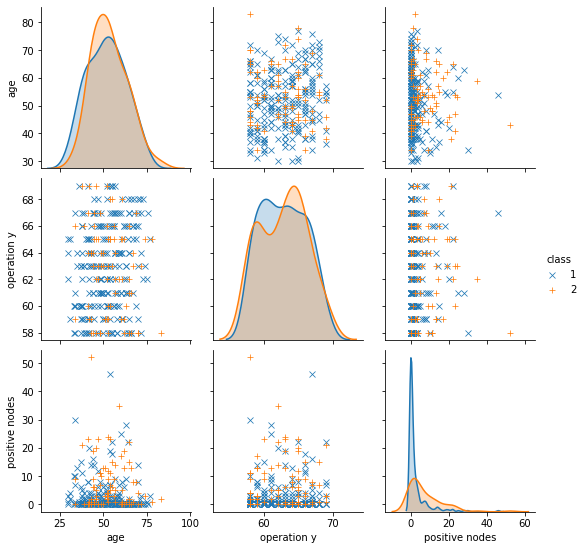

In [36]:
sns.pairplot(dataset4, hue='class', markers=['x','+'])  

plt.show()

# Cleveland database heart dicease

1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
14. target: 0= less chance of heart attack 1= more chance of heart attack

In [44]:
dataset5 = pd.read_csv('data/heart.csv')


display(dataset5)
print(dataset5.dtypes)

print("Nan values")
print(dataset5.isna().any())
print("Zero values")
print((dataset5 == 0).sum())


age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object
Nan values
age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool
Zero values
age           0
sex          96
cp          143
trestbps      0
chol          0
fbs         258
restecg     147
thalach       0
exang       204
oldpeak      99
slope        21
ca          175
thal          2
target      138
dtype: int64


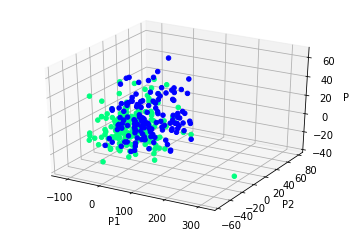

In [46]:
# PCA analysis

# Wanted to see if the data could be easier to separate after PCA.

dataset5_np = dataset5[dataset5.columns.difference(['target'])].to_numpy()

pca = PCA(n_components=3)
pca_data = pca.fit_transform(dataset5_np)
datafr_pca = pd.DataFrame(pca_data) 
datafr_pca.columns = ['P1', 'P2', 'P3'] 

labels = dataset5["target"].to_numpy()

# Visualize the pca
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(datafr_pca['P1'], datafr_pca['P2'], datafr_pca['P3'], c = labels, cmap = plt.cm.winter, alpha = 1) 

ax.set_xlabel('P1')
ax.set_ylabel('P2')
ax.set_zlabel('P3')

plt.show()  

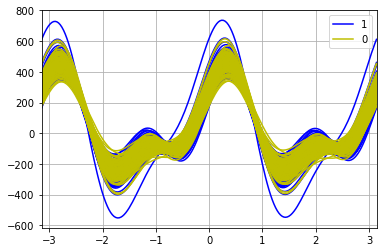

In [48]:
x = pd.plotting.andrews_curves(dataset5, 'target', color = ["b", "y"]) 
x.plot() 
  
plt.show()

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data i

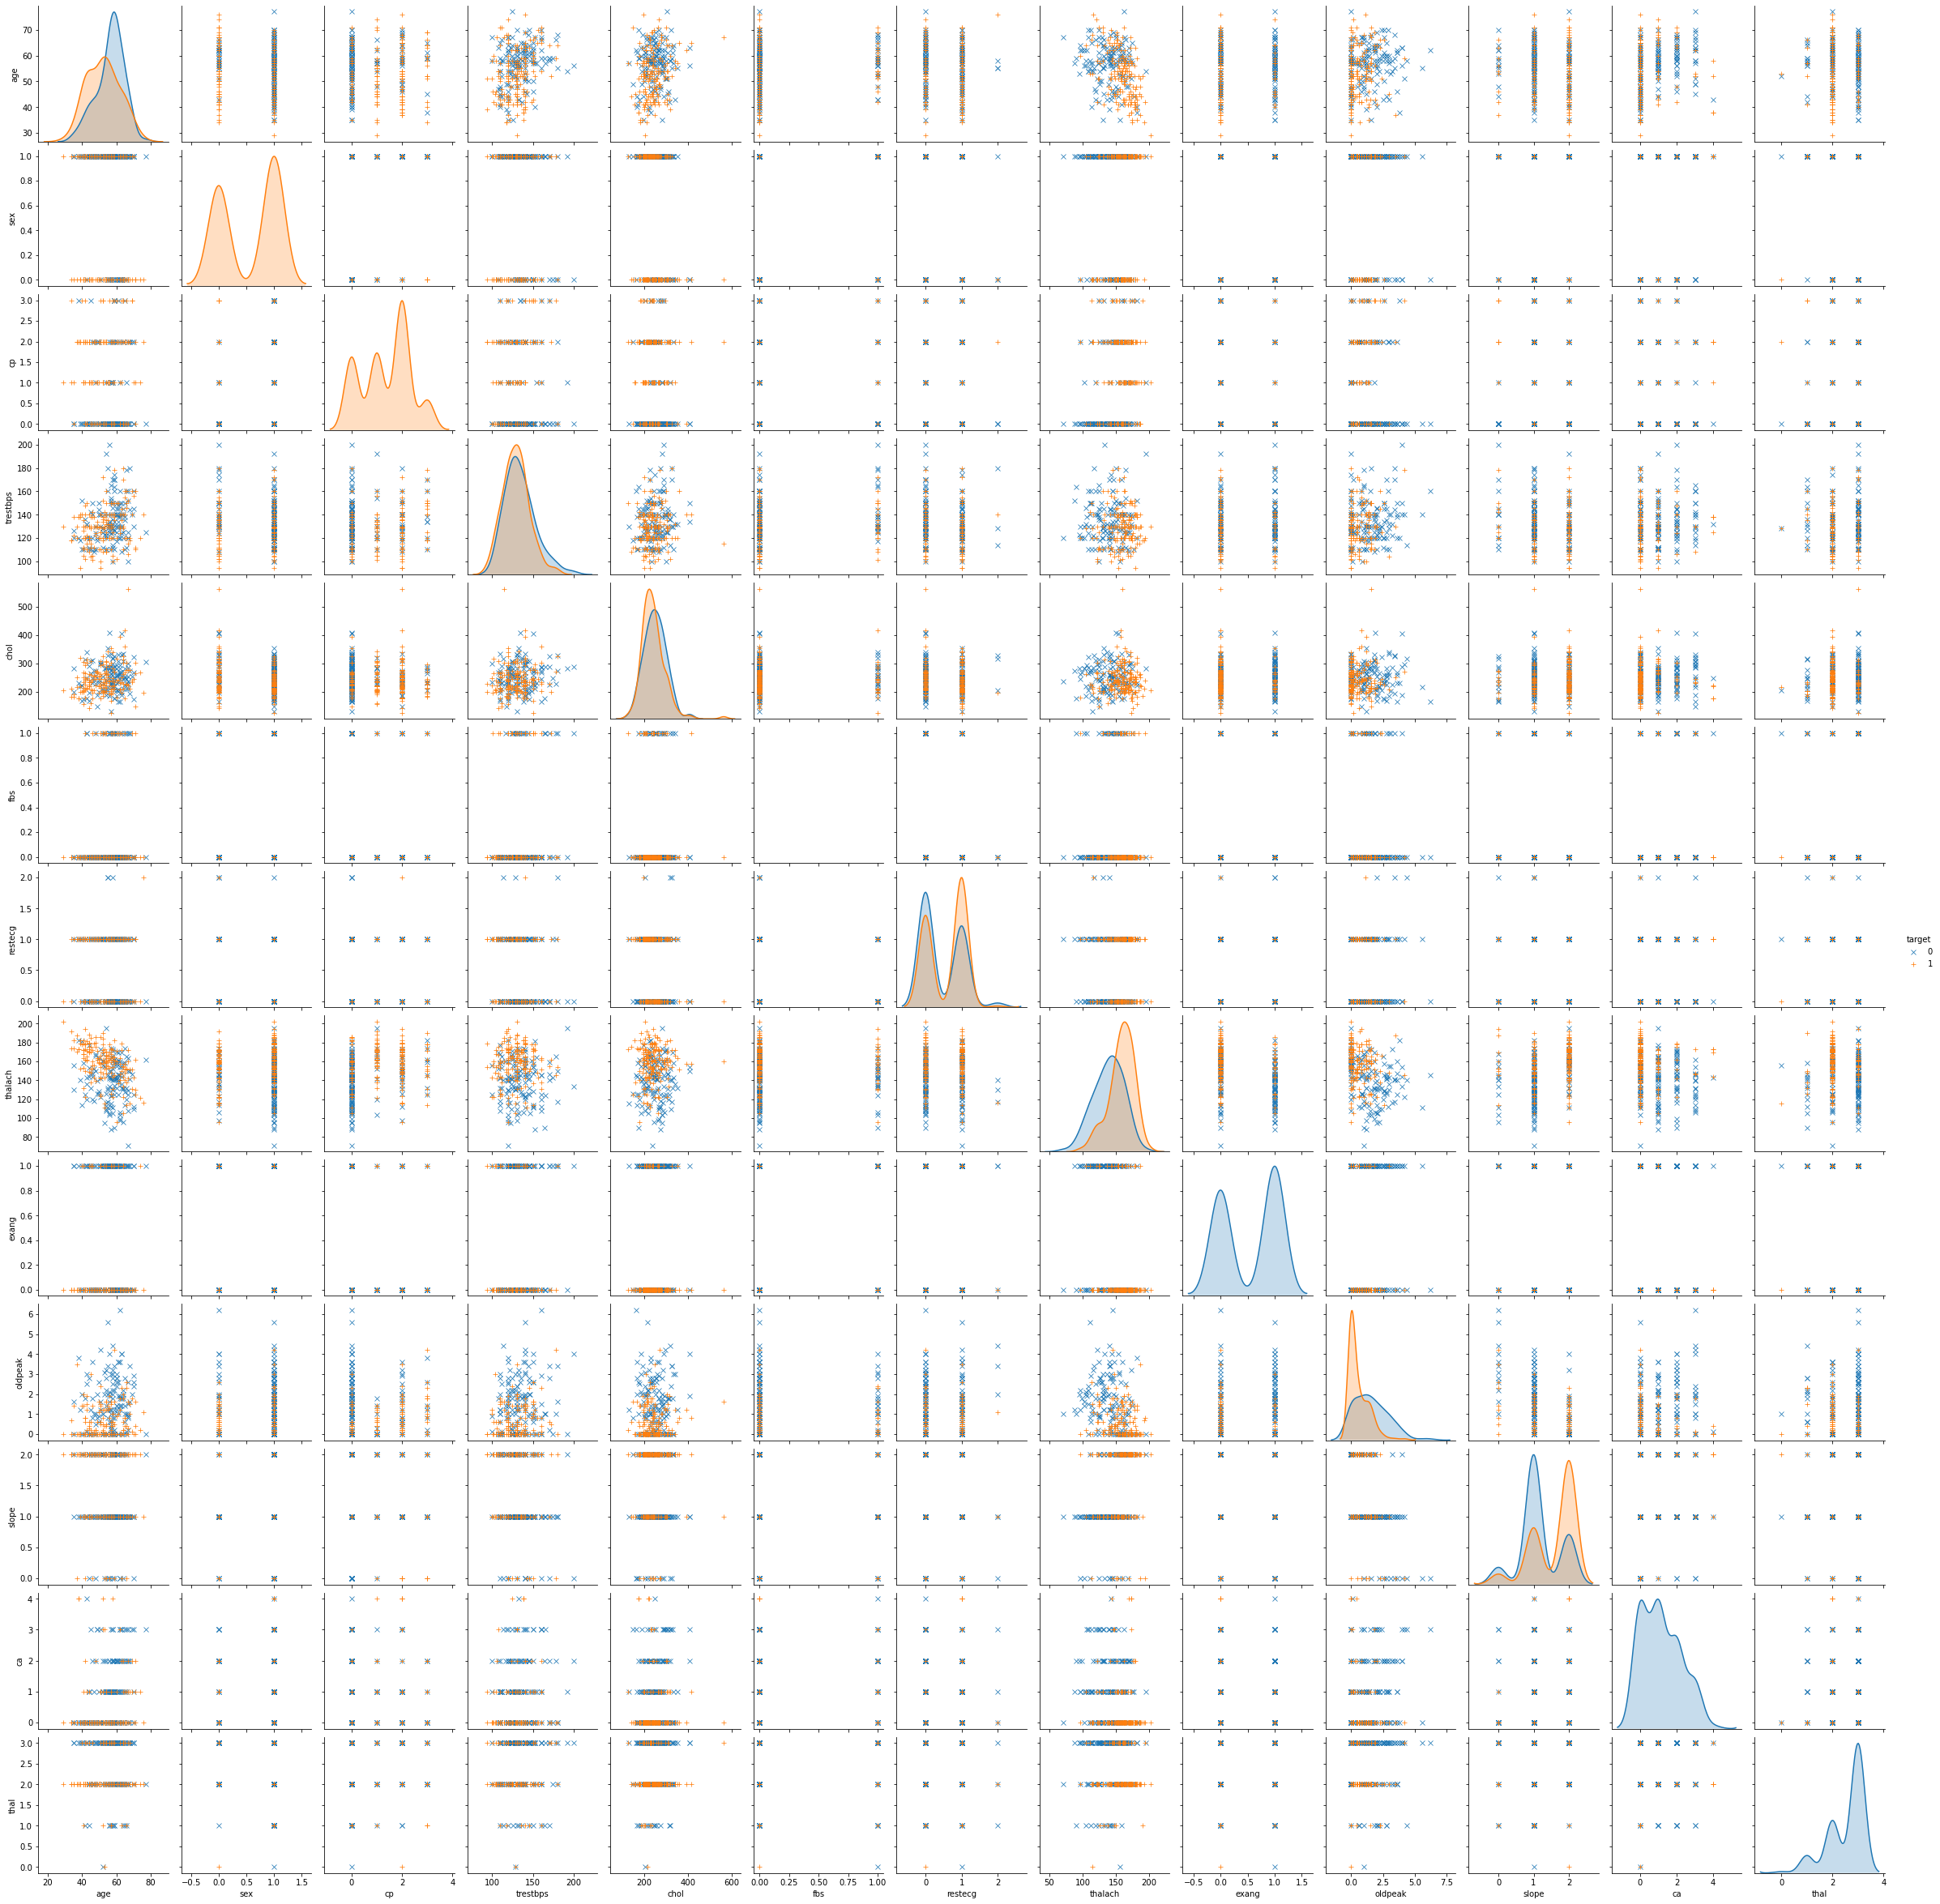

In [50]:
sns.pairplot(dataset5, hue='target', markers=['x','+'])  

plt.show()